In [369]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [370]:
reSize=(224,224)
colorSpace = "HSV"
thresholdLAB = (130,147)  #LAB color: (A, B), smaller B will increase green area
thresholdHSV = (107,124)  #HSV color: (H, S), smaller B will increase green area
testimg = "dataset/train/Small-flowered Cranesbill/fb60fbf1a.png"
print(threshold[1])

144


In [371]:
class PLANTSAREA:
    def __init__(self, imgPath, reSize=(250,250), cSpace="LAB"):
        image = cv2.imread(imgPath)
        self.image = cv2.resize(image, reSize, interpolation = cv2.INTER_AREA)
        if(cSpace=="LAB"):
            self.colorSpace = cv2.COLOR_BGR2LAB
        else:
            self.colorSpace = cv2.COLOR_BGR2HSV

    def extractPlantsArea(self, b_threshold=80, a_threshold=80):
        zeros = np.zeros(self.image.shape[:2], dtype = "uint8")

        imgLAB = cv2.cvtColor(self.image, self.colorSpace)
        
        if(self.colorSpace=="LAB"):
            (L, A, B) = cv2.split(imgLAB)
        else:
            (A, B, L) = cv2.split(imgLAB)

        (T_weeds_b, thresh_weeds_b) = cv2.threshold(B, b_threshold, 255, cv2.THRESH_BINARY)
        (T_weeds_a, thresh_weeds_a) = cv2.threshold(A, a_threshold, 255, cv2.THRESH_BINARY)
        imgRGB = cv2.merge([zeros, thresh_weeds_b, thresh_weeds_a])
        return imgRGB

    def countPlantsArea(self, image):
        width = image.shape[1]
        height = image.shape[0]
        gArea = 0.0
        rArea = 0.0
        grArea = 0.0

        for pixel_w in range(0, width, 1):
            for pixel_h in range(0, height, 1):
                (b, g, r) = image[pixel_h, pixel_w]
                if(g>0):
                    gArea += 1     
                if(r>0):
                    rArea += 1
                if(r>0 and g>0):
                    grArea += 1

        totalArea = width*height
        return (gArea/totalArea, rArea/totalArea, grArea/totalArea)

In [372]:
plantsArea = PLANTSAREA(testimg, reSize, colorSpace)

In [373]:
if(colorSpace=="LAB"):
    b_threshold = thresholdLAB[1]
    a_threshold = thresholdLAB[0]
else:
    b_threshold = thresholdHSV[1]
    a_threshold = thresholdHSV[0]    
    
imgPlants = plantsArea.extractPlantsArea(b_threshold=threshold[1], a_threshold=threshold[0])
(greenArea, redArea, overlapArea) = plantsArea.countPlantsArea(imgPlants)

In [374]:
print (greenArea, redArea, overlapArea)

0.2533482142857143 0.0013352997448979591 0.0


In [375]:
textRatio = str(int((greenArea+redArea-overlapArea) * 100)) + "%"
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
#cv2.putText(imgPlants, "green plants:" + str(int((greenArea+overlapArea)*100))+"%", (imgPlants.shape[1]-220, 20), font, 1, (255, 1, 126), 1)
#cv2.putText(imgPlants, "red plants:" + str(int(redArea*100))+"%", (imgPlants.shape[1]-220, 45), font, 1, (255, 1, 126), 1)
#cv2.putText(imgPlants, "total plants:" + textRatio, (imgPlants.shape[1]-220, 70), font, 1, (255, 1, 126), 1)
cv2.imwrite("output.png", imgPlants)
print (greenArea, redArea, overlapArea)

0.2533482142857143 0.0013352997448979591 0.0


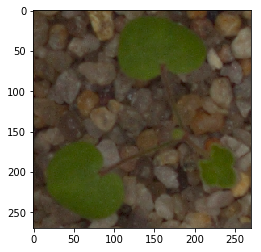

In [376]:
plt.imshow(mpimg.imread(testimg))

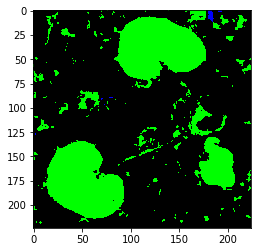

In [377]:
#plt.imshow(mpimg.imread('output.png'))
plt.imshow(imgPlants)